In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) ,(X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(len(X_train))
X_train[0].shape

60000


(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5
0
4
1


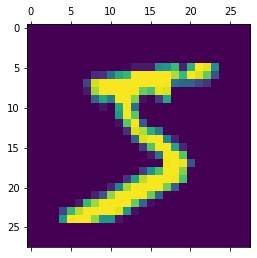

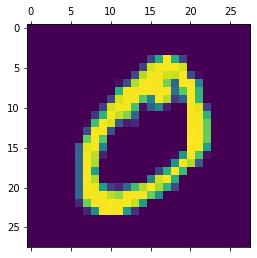

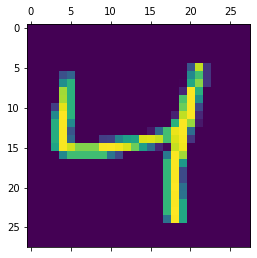

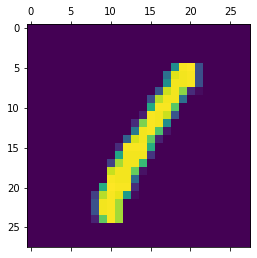

In [6]:
for i in range(4):
  plt.matshow(X_train[i])
  print(y_train[i])

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
print(X_train.shape)
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 28, 28)


(60000, 784)

In [9]:
model = keras.Sequential([
      keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')                 
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4662 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9260


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2682 - accuracy: 0.9246


[0.26823025941848755, 0.9246000051498413]

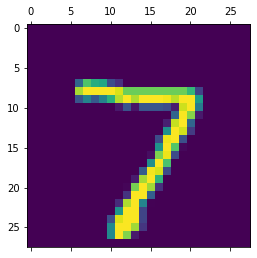

In [12]:
plt.matshow(X_test[0])

In [13]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([2.4255782e-02, 4.6748295e-07, 7.1389169e-02, 9.5236409e-01,
       2.4028122e-03, 1.1471295e-01, 1.5113046e-06, 9.9981833e-01,
       6.0608238e-02, 6.3211423e-01], dtype=float32)

In [14]:
np.argmax(y_pred[0])

7

In [15]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

Text(69.0, 0.5, 'Truth')

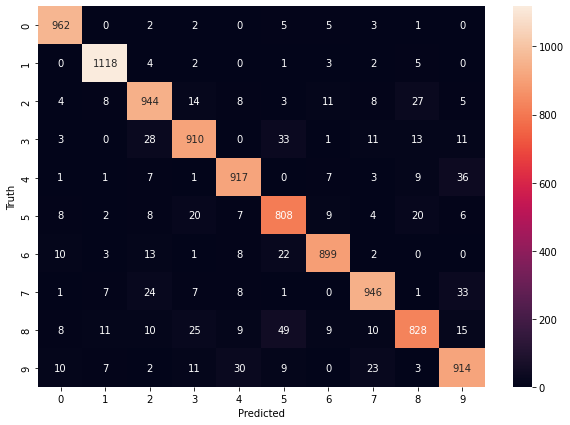

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2720 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1223 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0517 - accuracy: 0.9844


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9748


[0.07994810491800308, 0.9747999906539917]

Text(69.0, 0.5, 'Truth')

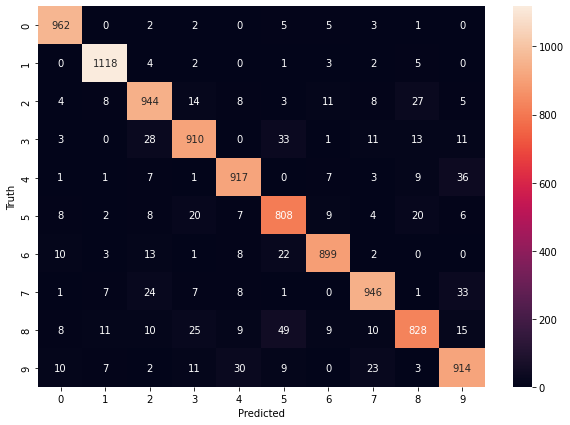

In [31]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2775 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1250 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0870 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0416 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0333 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0286 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0238 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0898 - accuracy: 0.9773


[0.08977002650499344, 0.9772999882698059]